## Ads Click-Through Rate Prediction - Classification

Click-through rate (CTR) is an important digital marketing metric that represents the ratio of the number of users who clicked on an ad to the total number of times the ad was viewed. CTR is used to evaluate the effectiveness of online advertising campaigns and measures how much a user is interested in an ad. The "Clicked on Ad" column shows whether a user clicked on an ad, while other variables (such as the user's daily internet usage, age, gender, income level) provide information about factors that may affect the click-through rate.

* Daily Time Spent on Site: Shows how much time a user spends on a site daily.
* Age: The user's age.
* Area Income: The average income level of the user's region.
* Daily Internet Usage: The time the user spends on the internet daily.
* Ad Topic Line: Brief information about the title or content of the ad.
* City: The city where the user lives.
* Gender: The gender of the user.
* Country: The country where the user lives.
* Timestamp: The timestamp of the moment the user saw or clicked on the ad.
* Clicked on Ad: A binary variable indicating whether the user clicked on the ad (1: Clicked, 0: Did not click).

Using this dataset, it is possible to analyze which demographic factors and internet usage habits affect the ad click-through rate. In particular, the relationships between the "Clicked on Ad" column and other variables can help develop strategies to improve ad performance.

In this case, the Clicked on Ad column will be the target variable (label) of the classification model. Our goal is to predict whether users will click on an ad, which is a binary classification problem.

The model you will obtain in this process will allow us to predict whether users will click on an ad in the future based on new data.

<img src='ads.png' width=550 >

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
df=pd.read_csv('ad_10000records.csv')
#Read the file.

## EDA - Exploratory Data Analysis

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [4]:
df.shape

(10000, 10)

In [5]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Gender,0
Country,0
Timestamp,0
Clicked on Ad,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [8]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [9]:
df['day']=df['Timestamp'].dt.day
df['month']=df['Timestamp'].dt.month
df['year']=df['Timestamp'].dt.year

In [10]:
df.drop('Timestamp', axis=1,inplace=True)

## Data Visualization

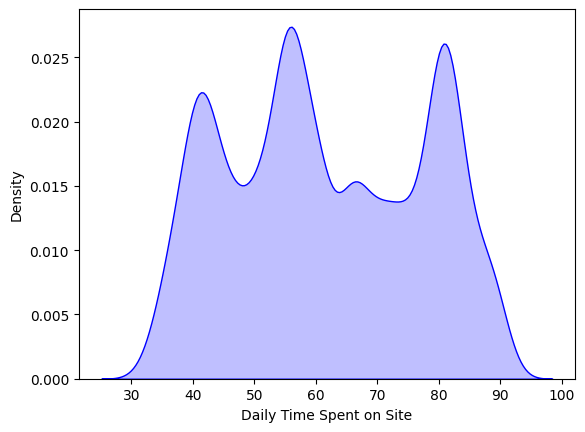

In [11]:
sns.kdeplot(x=df['Daily Time Spent on Site'], fill=True, color='blue');

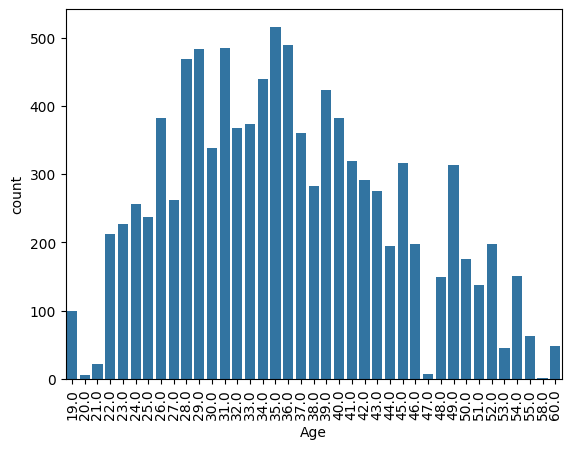

In [12]:
sns.countplot(x=df['Age'])
plt.xticks(rotation=90);

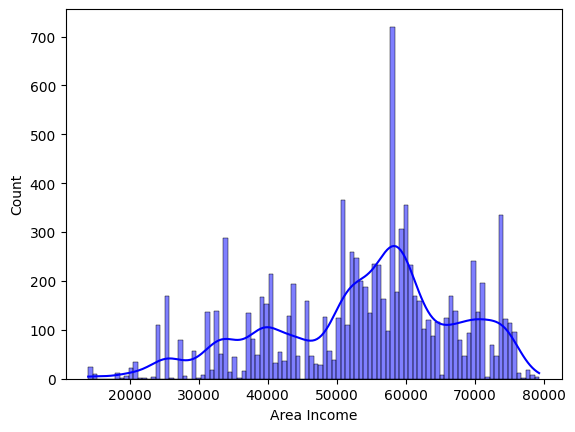

In [13]:
sns.histplot(x=df['Area Income'], kde=True, color='blue', bins=100);

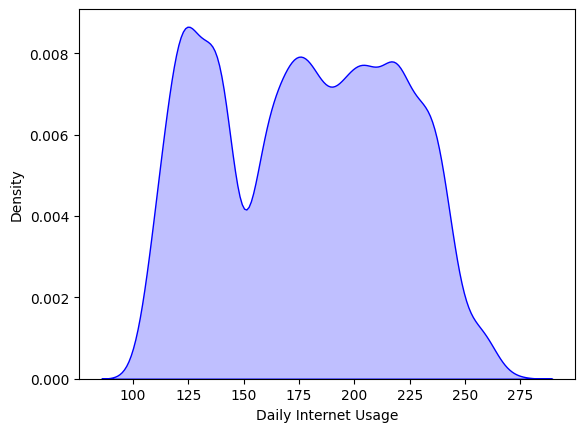

In [14]:
sns.kdeplot(x=df['Daily Internet Usage'], fill=True, color='blue');

In [15]:
df['City'].value_counts()

,count
City,
Hubbardmouth,336
West Brandonton,275
Lisafort,261
Wintersfort,230
Stewartbury,207
...,...
Turnerview,1
North Tiffany,1
North Kristine,1


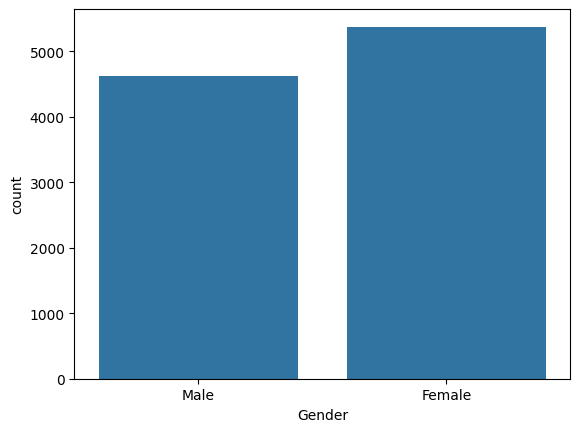

In [16]:
sns.countplot(x=df['Gender']);

In [17]:
df['Country'].value_counts()

,count
Country,
Australia,388
Czech Republic,330
Turkey,312
Qatar,224
Hong Kong,221
...,...
South Georgia and the South Sandwich Islands,1
Wallis and Futuna,1
Sierra Leone,1


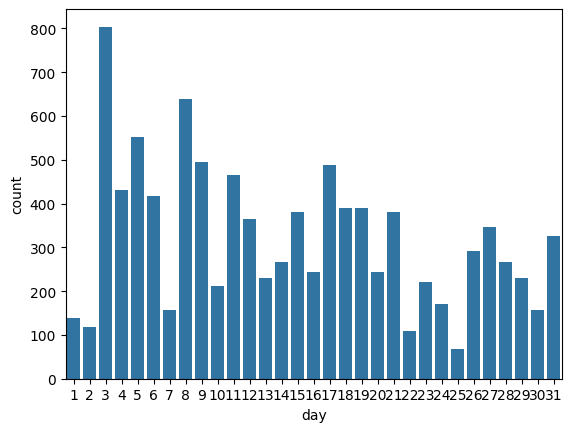

In [18]:
sns.countplot(x=df['day']);

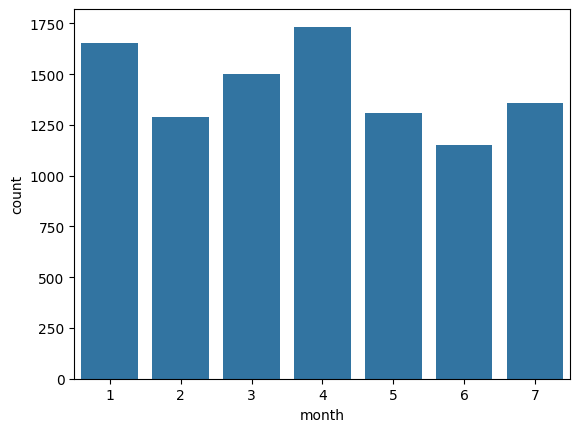

In [19]:
sns.countplot(x=df['month']);

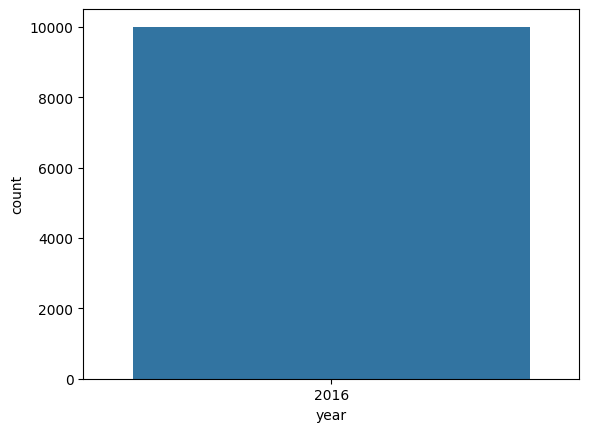

In [20]:
sns.countplot(x=df['year']);

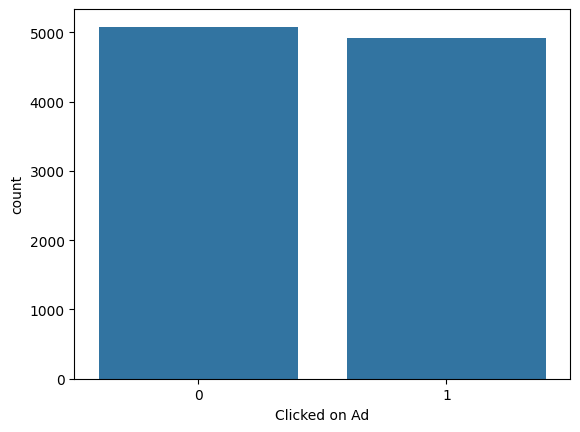

In [21]:
sns.countplot(x=df['Clicked on Ad']);

## Modelling

In [22]:
x=df.drop('Clicked on Ad', axis=1)
y=df[['Clicked on Ad']]

In [23]:
x=pd.get_dummies(x, drop_first=True)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

### Gaussian

In [25]:
g=GaussianNB()
g.fit(x_train,y_train)
gtahmin=g.predict(x_test)
accuracy_score(gtahmin,y_test)

0.787

In [26]:
confusion_matrix(gtahmin,y_test)

array([[863, 275],
       [151, 711]])

<Axes: >

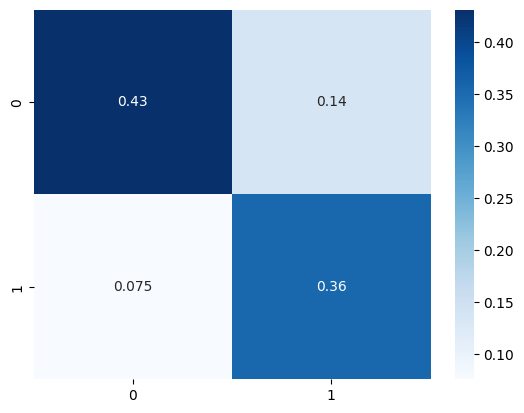

In [27]:
cm = confusion_matrix(gtahmin, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues')

In [28]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1138
           1       0.72      0.82      0.77       862

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



In [29]:
#K-Fold Cross Validation
x=df.drop('Clicked on Ad', axis=1)
y=df[['Clicked on Ad']]
x=pd.get_dummies(x, drop_first=True)

model=RandomForestClassifier()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.8865 0.8835 0.8645 0.8695 0.874 ]
Mean Accuracy: 0.8756


* K-fold Results

1. (Accuracy Scores):The scores are quite close to each other. The lowest accuracy is 86.4%, and the highest accuracy is 88.6%. This indicates that the model performs quite consistently across different data segments. The minimal performance fluctuations indicate that the model is not overfitting or underfitting.

2. Mean Accuracy:A mean accuracy of 87.5% indicates that the model performs well overall. This accuracy suggests that the model has a strong and balanced predictive ability on the dataset.

3. Variation:
Lowest accuracy: 86.4%
Highest accuracy: 88.6%
There are very small differences between the scores, indicating that the model is very consistent across different data segments. The small variation indicates that the model performs consistently and has good generalization ability.

4. Model Performance:
Average accuracy of 87.5% is generally considered acceptable and good performance. Although accuracy alone is not completely sufficient, especially in cases of class imbalance, these results indicate that the model successfully performs the classification task to a large extent.

General Comment:
Average accuracy of 87.5% of the model is generally considered a good performance level. Also, the very low variation between the scores indicates the consistency and reliability of the model. Since the overall performance of the model is strong and balanced, these results can be evaluated quite positively.

In [30]:
#Auc and Roc
y_scores = g.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

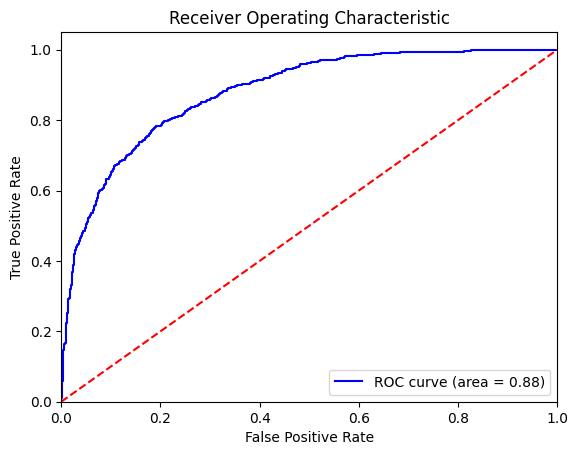

In [31]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

This graph displays the ROC curve (Receiver Operating Characteristic) and its corresponding AUC (Area Under the Curve). The ROC curve is used to evaluate the performance of a classification model. The key components of the curve are:

* X-axis (False Positive Rate): The proportion of negative cases that were incorrectly classified as positive. It ranges from 0 to 1.
* Y-axis (True Positive Rate): The proportion of correctly classified positive cases, also known as sensitivity. It also ranges from 0 to 1.

Interpretation of the graph:

* The blue line represents the model’s ROC curve. The closer the curve is to the top left corner, the better the model performs.
* The red dashed line represents a random classifier’s performance (AUC = 0.5). A model that falls along this line is no better than random guessing.
* The AUC value of 0.88 indicates that the model performs well. An AUC of 1 represents perfect classification, while 0.5 represents random performance. A value of 0.88 shows that the model is fairly good at distinguishing between positive and negative classes.
Overall, this suggests that the model is quite effective at making correct classifications and is reliable for this classification task.

### Bernoulli

In [32]:
b=BernoulliNB()
b.fit(x_train,y_train)
btahmin=b.predict(x_test)
accuracy_score(btahmin,y_test)

0.8685

In [33]:
confusion_matrix(btahmin,y_test)

array([[887, 136],
       [127, 850]])

<Axes: >

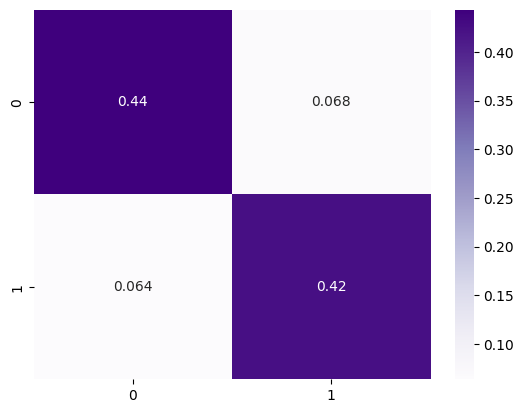

In [34]:
cm = confusion_matrix(btahmin, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples')

In [35]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1023
           1       0.86      0.87      0.87       977

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [38]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):

    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    nb = MultinomialNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,  b, nb, knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB','MultinomialNB','K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []


    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)

    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1


    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [39]:
algo_test(x,y)

,Accuracy,Precision,Recall,F1-score
Random Forest,0.8895,0.889586,0.8895,0.889479
BernoulliNB,0.8685,0.868513,0.8685,0.868489
Logistic Regression,0.8580,0.858130,0.8580,0.857961
MLP Classifier,0.8560,0.856390,0.8560,0.855917
AdaBoost,0.8380,0.843712,0.8380,0.837139
Gradient Boosting,0.8335,0.835845,0.8335,0.833082
Decision Tree,0.8235,0.823844,0.8235,0.823499
K-Nearest Neighbors,0.7695,0.769536,0.7695,0.769449
MultinomialNB,0.6655,0.666561,0.6655,0.664519
SVM,0.5465,0.546344,0.5465,0.544910


## AutoML with PyCaret

In [44]:
#pip install pycaret

In [41]:
from pycaret.classification import*

In [42]:
a=setup(data=df,target="Clicked on Ad")

,Description,Value
0,Session id,1598
1,Target,Clicked on Ad
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 12)"
5,Transformed train set shape,"(7000, 12)"
6,Transformed test set shape,"(3000, 12)"
7,Numeric features,7
8,Categorical features,4
9,Preprocess,True


In [43]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8746,0.9459,0.8725,0.8726,0.8724,0.7491,0.7493,0.9200
xgboost,Extreme Gradient Boosting,0.8724,0.9445,0.8672,0.8728,0.8698,0.7448,0.7450,0.2880
lightgbm,Light Gradient Boosting Machine,0.8719,0.9465,0.8719,0.8684,0.8699,0.7437,0.7440,0.4030
gbc,Gradient Boosting Classifier,0.8701,0.9445,0.8716,0.8655,0.8683,0.7402,0.7405,1.1590
ada,Ada Boost Classifier,0.8684,0.9409,0.8629,0.8688,0.8657,0.7368,0.7370,0.3960
rf,Random Forest Classifier,0.8673,0.9439,0.8655,0.8650,0.8651,0.7345,0.7348,1.2070
lr,Logistic Regression,0.8640,0.9377,0.8576,0.8648,0.8610,0.7279,0.7282,2.7070
ridge,Ridge Classifier,0.8624,0.9390,0.8440,0.8722,0.8577,0.7246,0.7252,0.1300
lda,Linear Discriminant Analysis,0.8624,0.9389,0.8440,0.8722,0.8577,0.7246,0.7252,0.1280
dt,Decision Tree Classifier,0.8261,0.8261,0.8173,0.8272,0.8221,0.6521,0.6524,0.3120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Summary

This project is a classification problem that aims to predict whether users will click on online ads. The data includes features such as users' demographic information (age, income, gender, city, country), internet and site usage habits. The target variable "Ad Clicked" is a binary variable indicating whether the user clicked on an ad (clicked/not clicked).

Within the scope of the project, firstly the data was cleaned and made suitable for modeling. Then a model was created with classification algorithms such as logistic regression, decision trees, random forests and evaluated with metrics such as performance, accuracy, F1 score, precision, recall, auc and roc. We also made an evaluation with K-fold cross validation. Random Forest gave the best result in terms of accuracy score.We did automl with pycaret.We did not apply deep learning because our success rate was good and we completed our project.